In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
# Shift-JIS エンコーディングでCSVファイルを読み込む
data_shiftjis = pd.read_csv("../data/#統合データ_所在管理LTデータ9月（土日削除）.csv", encoding="shift-jis")
# 最初の5行を表示してデータの概要を確認
data_shiftjis.head()

,かんばんシリアル,伝票番号,拠点所番地,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,...,基準在庫日数,検収入庫LT/設計値_検収入庫LT,入庫出庫LT/設計値_入庫出庫LT,出庫回収LT/設計値_出庫回収LT,出庫回収LT（基準在庫枚数込み）/設計値_出庫回収LT,社内LT（検収〜回収LT）/設計値_社内LT（検収〜回収LT）,検収日時（HHMM）,検収日時（HH:MM）,納入予定時間（HHMM）,検収時間と納入予定時間の差分（HHMM）
0,1Z23J00091508,XCGP130,20488,G1144ECE010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",8,矢崎総業（株）,< NULL >,回収済,2023/9/29 0:00,...,0.58,1.400000,0.571429,1.000000,0.773646,0.898423,1805,18:05,900,905
1,1Z23J00068574,XCGL830,20488,G1144ECE010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",8,矢崎総業（株）,< NULL >,回収済,2023/9/28 0:00,...,0.58,1.200000,5.571429,0.636364,0.492320,3.054638,1015,10:15,900,115
2,1Z23J00066432,XCGL630,30357,35847ECE010,ﾁｭｰﾌﾞT/Aﾙｰﾌﾞｱﾌﾟﾗｲ,40,（株）メタルテック,< NULL >,回収済,2023/9/28 0:00,...,0.50,1.181818,5.896552,1.454545,0.840072,3.445545,713,7:13,600,113
3,1Z23J00065428,XCGL830,20488,G1144ECE010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",8,矢崎総業（株）,< NULL >,回収済,2023/9/28 0:00,...,0.58,1.200000,5.464286,0.909091,0.703314,3.054638,1015,10:15,900,115
4,1Z23J00063618,XCGJ670,30358,35847ECE020,ﾁｭｰﾌﾞT/Aﾙｰﾌﾞｱﾌﾟﾗｲ,60,（株）メタルテック,< NULL >,回収済,2023/9/27 0:00,...,0.49,2.900000,8.896552,1.272727,0.606876,4.928854,704,7:04,600,104


In [137]:
import datetime

# 時間帯を指定してデータをフィルタリングする関数
def filter_by_time(data, column, start_time, end_time):
    # 時間帯を跨ぐ場合（例: 18:10〜0:20のような場合）
    if start_time > end_time:
        return data[(data[column] >= start_time) | (data[column] <= end_time)]
    # 通常の時間帯
    else:
        return data[(data[column] >= start_time) & (data[column] <= end_time)]

# 日付と時間の文字列からHHMM形式に変換する関数
def convert_datetime_to_HHMM(datetime_str):
    dt = datetime.datetime.strptime(datetime_str, '%Y/%m/%d %H:%M')
    return dt.hour * 100 + dt.minute

# 「順立装置入庫日時」のカラムをHHMM形式に変換
data_shiftjis["順立装置入庫日時（HHMM）"] = data_shiftjis["順立装置入庫日時"].dropna().apply(lambda x: convert_datetime_to_HHMM(x))

# パターン①の条件に基づいてデータをフィルタリング
filtered_data_1 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 350, 800)
within_range_1 = filter_by_time(filtered_data_1, "順立装置入庫日時（HHMM）", 930, 2140).shape[0]
outside_range_1 = filtered_data_1.shape[0] - within_range_1

# 割合を計算
within_percentage_1 = within_range_1 / filtered_data_1.shape[0] * 100
outside_percentage_1 = outside_range_1 / filtered_data_1.shape[0] * 100

within_percentage_1, outside_percentage_1

# パターン②の条件に基づいてデータをフィルタリング
filtered_data_2 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 800, 1230)
within_range_2 = filter_by_time(filtered_data_2, "順立装置入庫日時（HHMM）", 1400, 150).shape[0]
outside_range_2 = filtered_data_2.shape[0] - within_range_2

# 割合を計算
within_percentage_2 = within_range_2 / filtered_data_2.shape[0] * 100
outside_percentage_2 = outside_range_2 / filtered_data_2.shape[0] * 100

within_percentage_2, outside_percentage_2

# パターン③の条件に基づいてデータをフィルタリング
filtered_data_3 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 1230, 1550)
within_range_3 = filter_by_time(filtered_data_3, "順立装置入庫日時（HHMM）", 1720, 620).shape[0]
outside_range_3 = filtered_data_3.shape[0] - within_range_3

# 割合を計算
within_percentage_3 = within_range_3 / filtered_data_3.shape[0] * 100
outside_percentage_3 = outside_range_3 / filtered_data_3.shape[0] * 100

within_percentage_3, outside_percentage_3

# パターン④の条件に基づいてデータをフィルタリング
filtered_data_4 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 1550, 2000)
within_range_4 = filter_by_time(filtered_data_4, "順立装置入庫日時（HHMM）", 2130, 940).shape[0]
outside_range_4 = filtered_data_4.shape[0] - within_range_4

# 割合を計算
within_percentage_4 = within_range_4 / filtered_data_4.shape[0] * 100
outside_percentage_4 = outside_range_4 / filtered_data_4.shape[0] * 100

within_percentage_4, outside_percentage_4

# パターン⑤の条件に基づいてデータをフィルタリング
filtered_data_5 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 2000, 30)
within_range_5 = filter_by_time(filtered_data_5, "順立装置入庫日時（HHMM）", 200, 1550).shape[0]
outside_range_5 = filtered_data_5.shape[0] - within_range_5

# 割合を計算
within_percentage_5 = within_range_5 / filtered_data_5.shape[0] * 100
outside_percentage_5 = outside_range_5 / filtered_data_5.shape[0] * 100

within_percentage_5, outside_percentage_5

# パターン⑥の条件に基づいてデータをフィルタリング
filtered_data_6 = filter_by_time(data_shiftjis, "検収日時（HHMM）", 30, 350)
within_range_6 = filter_by_time(filtered_data_6, "順立装置入庫日時（HHMM）", 520, 1820).shape[0]
outside_range_6 = filtered_data_6.shape[0] - within_range_6

# 割合を計算
within_percentage_6 = within_range_6 / filtered_data_6.shape[0] * 100
outside_percentage_6 = outside_range_6 / filtered_data_6.shape[0] * 100

within_percentage_6, outside_percentage_6


(89.44723618090453, 10.552763819095476)

In [138]:
# 時間差（検収入庫LT）を計算する関数
def calculate_LT(row):
    # HHMM形式の時間を分に変換
    reception_time = row["検収日時（HHMM）"]
    storage_time = row["順立装置入庫日時（HHMM）"]
    reception_minutes = (reception_time // 100) * 60 + (reception_time % 100)
    storage_minutes = (storage_time // 100) * 60 + (storage_time % 100)
    
    # 時間差を計算
    lt = storage_minutes - reception_minutes
    # 時間差が負の場合、24時間を加算（翌日として扱う）
    if lt < 0:
        lt += 24 * 60
    return lt

# 検収入庫LTを計算
#data_shiftjis["検収入庫LT"] = data_shiftjis.apply(calculate_LT, axis=1)

# 各パターンごとの中央値を計算
medians = []
patterns = [
    (350, 800, 930,2140),
    (800, 1230, 1400, 150),
    (1230, 1550, 1720, 620),
    (1550, 2000, 2130, 940),
    (2000, 30, 200, 1550),
    (30, 350, 520, 1820)
]

for p in patterns:
    filtered_data = filter_by_time(data_shiftjis, "検収日時（HHMM）", p[0], p[1])
    median = filtered_data["検収入庫LT"].median()
    #median = filtered_data["検収入庫LT"].count()
    medians.append(median)

medians


[0.15, 0.27, 0.42, 0.24, 0.24, 0.14]

In [139]:
# 各パターンごとに「検収入庫LT/設計値_検収入庫LT」の中央値を再計算
medians2 = []

for p in patterns:
    filtered_data = filter_by_time(data_shiftjis, "検収日時（HHMM）", p[0], p[1])
    median = (filtered_data["検収入庫LT/設計値_検収入庫LT"].median()-1)*100
    medians2.append(median)

medians2

[-38.0952381,
 13.99999999999999,
 70.8333333,
 9.090909099999989,
 -4.166666699999999,
 -36.3636364]

In [140]:
# 計算結果をテーブルデータとしてまとめる
results = pd.DataFrame({
    'トラック便（from西尾東to安城第一工場）': ['1便', '2便', '3便', '4便', '5便', '6便'],
    '検収日時範囲': ['3:50〜8:00（4時間10分）', '8:00〜12:30（4時間30分）', '12:30〜15:50（3時間20分）', '15:50〜20:00（4時間10分）', '20:00〜0:30（4時間30分）', '0:30〜3:50（3時間20分）'],
    '工場到着日時': ['9:30', '14:00', '17:20', '21:30', '2:00', '5:20'],
    '入庫日時範囲': ['9:30〜15:50（4時間20分）', '14:00〜18:20（4時間20分）', '17:20〜21:40（4時間20分）', '21:30〜1:50（4時間20分）', '2:00〜6:20（4時間20分）', '5:20〜9:40（4時間20分）'],
    '入庫日時範囲内の割合(%)': [within_percentage_1, within_percentage_2, within_percentage_3, within_percentage_4, within_percentage_5, within_percentage_6],
    '入庫日時範囲外の割合(%)': [outside_percentage_1, outside_percentage_2, outside_percentage_3, outside_percentage_4, outside_percentage_5, outside_percentage_6],
    '検収〜入庫LT（分）': [medians[0],medians[1],medians[2],medians[3],medians[4],medians[5]],
    '検収入庫LTの設計値オーバー率': [medians2[0],medians2[1],medians2[2],medians2[3],medians2[4],medians2[5]]
})

results


,トラック便（from西尾東to安城第一工場）,検収日時範囲,工場到着日時,入庫日時範囲,入庫日時範囲内の割合(%),入庫日時範囲外の割合(%),検収〜入庫LT（分）,検収入庫LTの設計値オーバー率
0,1便,3:50〜8:00（4時間10分）,9:30,9:30〜15:50（4時間20分）,72.222222,27.777778,0.15,-38.095238
1,2便,8:00〜12:30（4時間30分）,14:00,14:00〜18:20（4時間20分）,75.999402,24.000598,0.27,14.000000
2,3便,12:30〜15:50（3時間20分）,17:20,17:20〜21:40（4時間20分）,86.778846,13.221154,0.42,70.833333
3,4便,15:50〜20:00（4時間10分）,21:30,21:30〜1:50（4時間20分）,76.983710,23.016290,0.24,9.090909
4,5便,20:00〜0:30（4時間30分）,2:00,2:00〜6:20（4時間20分）,94.906997,5.093003,0.24,-4.166667
5,6便,0:30〜3:50（3時間20分）,5:20,5:20〜9:40（4時間20分）,89.447236,10.552764,0.14,-36.363636


/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 21106 (\N{CJK UNIFIED IDEOGRAPH-5272}) missing from current font.
  app.launch_new_instance()
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: User

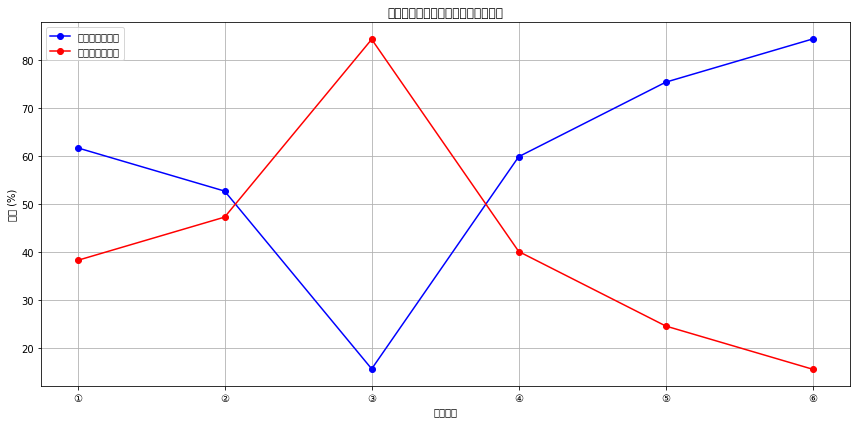

In [108]:
# 折れ線グラフを描画
plt.figure(figsize=(12, 6))

# 入庫日時範囲内と範囲外の割合を折れ線グラフでプロット
plt.plot(results['パターン'], results['入庫日時範囲内の割合(%)'], marker='o', label='入庫日時範囲内', color='b')
plt.plot(results['パターン'], results['入庫日時範囲外の割合(%)'], marker='o', label='入庫日時範囲外', color='r')

# タイトル、ラベル、凡例を設定
plt.title('各パターンにおける入庫日時の割合')
plt.xlabel('パターン')
plt.ylabel('割合 (%)')
plt.grid(True)
plt.legend()

# グラフを表示
plt.tight_layout()
plt.show()
